### Introduction :
Nous allons analyser ici la répartition des temps d'arrivés de coureurs lors du trail des allumés de Raismes en 2024. Il s'agit de la catégorie Senior Homme, lors d'une course de 9km et 136m de dénivelé.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
url = 'https://www.le-sportif.com/ResultsDetail/ResultsHistoryDetail_List.aspx?EventResultsID=505&EventResultsActivityID=54640&EventResultsActivityRND=69d27b44-743a-4b94-8c90-91bb8eb93297&SRCHCATEG=SEH&SRCHSEX=M'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


In [3]:
table = soup.find('table')
rows = soup.find_all('tr')

In [4]:
data = []
for row in rows :
    cols = row.find_all('span')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
df = pd.DataFrame(data)
df.head(20)

,0,1,2,3,4,5,6,7
0,Résultats,None,None,None,None,None,None,None
1,Course des Terrils,/ 2024,59 - Raismes - Nord - France,sept,None,None,None,None
2,épreuve,None,None,None,None,None,None,None
3,9 km - les Allumés,"Trail, Course nature",None,None,None,None,None,None
4,classement,None,None,None,None,None,None,None
5,Class.,Temps,Nom,Club,Dossard,Categ.,None,None
6,3,00:37:35,VANEENOO,Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M
7,5,00:38:39,BEN YAHIA,Karim,7403,SEH,M,None
8,6,00:39:51,DELEURY,Alexis,7151,SEH,M,None
9,8,00:41:05,JASKIEWICZ,Arthur,7104,SEH,M,None


In [6]:
df.head(20)

,0,1,2,3,4,5,6,7
0,Résultats,None,None,None,None,None,None,None
1,Course des Terrils,/ 2024,59 - Raismes - Nord - France,sept,None,None,None,None
2,épreuve,None,None,None,None,None,None,None
3,9 km - les Allumés,"Trail, Course nature",None,None,None,None,None,None
4,classement,None,None,None,None,None,None,None
5,Class.,Temps,Nom,Club,Dossard,Categ.,None,None
6,3,00:37:35,VANEENOO,Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M
7,5,00:38:39,BEN YAHIA,Karim,7403,SEH,M,None
8,6,00:39:51,DELEURY,Alexis,7151,SEH,M,None
9,8,00:41:05,JASKIEWICZ,Arthur,7104,SEH,M,None


In [7]:
df.tail(20)

,0,1,2,3,4,5,6,7
76,383,01:10:05,RICQUE,Maxence,7404,SEH,M,None
77,396,01:10:26,DE GEETER,Remi,7491,SEH,M,None
78,400,01:11:04,BENAYED,Samuel,7125,SEH,M,None
79,413,01:12:01,ROOTHAER,Xavier,7387,SEH,M,None
80,417,01:12:06,VALKENAERE,Julien,7142,SEH,M,None
81,432,01:12:49,CHAMBÉRY,Thomas,7527,SEH,M,None
82,451,01:14:10,DRUELLE,Antonin,7230,SEH,M,None
83,475,01:16:22,GELY,Corentin,7258,SEH,M,None
84,477,01:16:24,DOREAU,Alexandre,7213,SEH,M,None
85,478,01:16:34,BEN CHEIKH,Montassar,7300,SEH,M,None


In [6]:
df.drop(df.index[0:5], inplace=True)

In [7]:
df.reset_index(inplace=True)

In [8]:
df.columns = df.iloc[0]
df = df[1:]
df.reset_index()

,index,5,Class.,Temps,Nom,Club,Dossard,Categ.,None,None
0,1,6,3,00:37:35,VANEENOO,Charles,METROPOLE TRAIL NATURE VILLENEUVE DASCQ,7444,SEH,M
1,2,7,5,00:38:39,BEN YAHIA,Karim,7403,SEH,M,None
2,3,8,6,00:39:51,DELEURY,Alexis,7151,SEH,M,None
3,4,9,8,00:41:05,JASKIEWICZ,Arthur,7104,SEH,M,None
4,5,10,10,00:41:29,DEBEVER,Baptiste,7218,SEH,M,None
...,...,...,...,...,...,...,...,...,...,...
85,86,91,529,01:20:38,GILLERON,Jerome,7537,SEH,M,None
86,87,92,Début Précédent 1 Suivant Fin,1,None,None,None,None,None,None
87,88,93,Le-Sportif est la seule plateforme d'inscripti...,None,None,None,None,None,None,None
88,89,94,COPYRIGHT / RESPONSABILITE,None,None,None,None,None,None,None


In [9]:
df = df.drop(df.index[86:])

In [10]:
df['Nom'] = df['Nom'].fillna('')
df['Club'] = df['Club'].fillna('')
df['Nom/Prenom'] = df[['Nom', 'Club']].agg(' '.join, axis=1)
df.drop(['Nom', 'Club'], axis=1 , inplace=True)

In [11]:
cols_to_move = df.columns[7]
df = df[[*df.columns[:3], cols_to_move, *df.columns[3:7]]]

In [12]:
df.rename(columns={'Class.': 'Classement', 'Categ.': 'Categorie'}, inplace=True)

In [13]:
df['Dossard'] = pd.to_numeric(df['Dossard'], errors='coerce')
df['Categorie'] = pd.to_numeric(df['Categorie'], errors='coerce')

In [14]:
df['Dossard'] = df['Dossard'].combine_first(df['Categorie'])
df.drop(columns=['Categorie',df.columns[0]], axis=1 , inplace=True)
df = df.iloc[:,:4]

In [15]:
df['Dossard'] = df['Dossard'].astype(int)

In [16]:
def convertir_en_minutes(temps_str):
    h, m, s = map(int, temps_str.split(':'))
    return h * 60 + m * 1

In [17]:
df['Temps_min'] = [convertir_en_minutes(t) for t in df['Temps']]

In [18]:
df.describe()

,Dossard,Temps_min
count,86.000000,86.000000
mean,7297.895349,57.372093
std,155.894461,11.931221
min,7031.000000,37.000000
25%,7156.250000,46.250000
50%,7286.500000,56.000000
75%,7416.000000,67.750000
max,7582.000000,80.000000


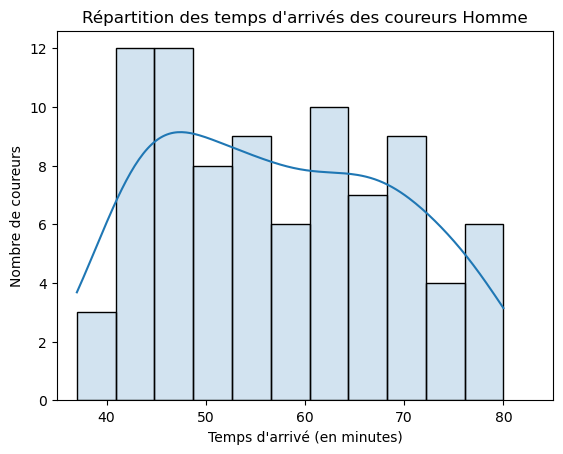

In [19]:
ax = sns.histplot(df['Temps_min'], binwidth=4, kde=True, alpha=0.2)
plt.xlim(35,85)
plt.title("Répartition des temps d'arrivés des coureurs Homme")
plt.xlabel("Temps d'arrivé (en minutes)")
plt.ylabel("Nombre de coureurs")
plt.show()

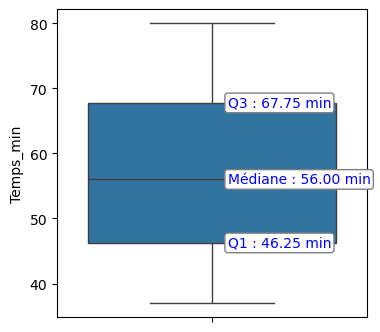

In [37]:
plt.figure(figsize=(4, 4))
ax = sns.boxplot(df['Temps_min'])
# Calcul des quartiles
q1 = df["Temps_min"].quantile(0.25)
q2 = df["Temps_min"].quantile(0.50)
q3 = df["Temps_min"].quantile(0.75)

for q, label in zip([q1, q2, q3], ["Q1", "Médiane", "Q3"]):
    ax.text(
        x=0.05, y=q, 
        s=f"{label} : {q:.2f} min",
        ha='left', va='center',
        color='blue',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="gray")
    )


Le graphique montre la répartition des temps d'arrivés des coureurs lors de la course. La moyenne du temps de course est de 57 minutes avec 25% de coureurs arrivés en moins de 47 minutes et 75% arrivés en 68 minutes. On en déduit donc que 50% des coureurs sont arrivés en un laps de 19 minutes.
Sachant qu'il y avait 86 inscrits, que le premier coureur est arrivé en 37 minutes et le dernier en 80 minutes.